# PHASE 1 PROJECT - Aviation Risk Analysis & Recommendations

---

## Introduction

As the company is seeking to diversify its portfolio through expansion into commercial and private aviation, it is impotrant to have a deep understanding of operational risks. Using the accident data from the National Transportation Safety Board, this project evaluates the safety records of various aircraft manufacturesrs and models from 1962 to 2023. I will explore the data to determine the lowest risk options available. This will inform actionable recommendations to stakeholders to acquire safe and reliable fleet.

## Business Understanding

### The Business Problem
While the company has capital ready for investment, the new aviation division lacks historical knowledge regarding the operational risks associated with different aircraft manufacturers and models. Purchasing aircraft without a clear understanding of their safety profiles poses significant risks

### Objectives
The objective of this analysis is to:
1. Identify the top 3 low-risk aircraft categories and manufacturers.
2. Understand what factors increase accident severity.
3. Recommend where the company should invest.

This project directly supports strategic growth by giving leadership a clear, evidence-based foundation for selecting aircraft that offer the best balance of safety, reliability, and long-term operational value.

### Goals
To achieve the business objectives, we will perform the following data science tasks using the NTSB dataset:
- Quantify Risk by creating measurable metrics for "risk" using **Total.Fatal.Injuries** and **Aircraft.damage**.
- Trend Analysis- Analyze safety performance over time (**Event.Date**) to ensure recommendations are based on relevant, modern data rather than outdated historical trends.
- Comparative Analysis: Compare **Make** and **Model** performance against the average incident rates to identify outliers (both good and bad).

### Key Stakeholders
1. **Head of Aviation Division:** Primary consumer of the insights; responsible for the final purchasing decision.
2. **Investment Committee:** responsible for the financial implications of "Hull Loss" and asset durability.
3. **Operations Team:** interested in reliability and potential for non-fatal incidents that cause downtime.

### Business Impact
Effective use of these insights will:
- Reduce financial risk through the purchase of safer aircraft
- Improve passenger and crew safety
- Support compliance with aviation safety standards
- Strengthen long-term operational sustainability
- Enhance the company's reputation as a safety-first aviation operator

---

## Business Requirements

To support leadership in making informed decisions about entering the aviation market, the following business requirements define the analysis.
## Data Strategy

The relevant columns include:
- Make
- Model
- Aircraft.Category
- Broad.Phase.of.Flight
- Weather.Condition
- Number.of.Engines
- Total.Fatal.Injuries
- Total.Serious.Injuries
- Total.Minor.Injuries
- Total_Uninjured
- Aircraft.Damage
- Purpose.of.flight
- Event.Date

---

#### Identify Low-Risk Aircraft for Purchase
The business needs clear, data-driven guidance on which aircraft categories and manufacturers have the safest historical performance by:
1. Comparing accident frequency across aircraft categories (e.g., single-engine, multi-engine, helicopters).
2. Measuring accident severity (fatal, serious, minor).
3. Assessing aircraft damage outcomes (destroyed, substantial, minor).
4. Determine aircraft types with consistently low fatality and damage rates.

#### Evaluate Key Risk Factors That Impact Safety

Leadership needs insight into what conditions increase accident severity. this  is by:

- Determining how weather conditions influence accidents.
- Analyzyng safety differences between **commercial, corporate, and personal flights**.
- Examining which phases of flight **(takeoff, landing, cruise)** have the highest risk.
- Evaluating whether certain aircraft features **(engine count, aircraft category)** correlate with higher severity.

---

## Data Understanding
#### Data source
the dataset for this analysis is sourved from **National Transportation Safety Board, that covers aviation accidents and incidents involving aircrafts in the United States and international waters from 1962 to 2023.
This data serves as a reliable sourve to determine aircraft safety records.

#### Data Schema
The dataset includes tens of thousands of records, where each row represents a single aviation accident or incident.
Each record contains information about:
- The aircraft (type, category, manufacturer, model)
- The event (date, location, purpose of flight)
- The environment (weather, light conditions)
- The outcome (injuries, fatalities, damage level)

This makes the dataset comprehensive enough to evaluate both accident frequency and accident severity across aircraft types.


#### Data Quality
##### Missing Values
- Some older records (1960s–1980s) may lack detail
- Certain columns may have missing values (None) that may need to be filled or droped.
- Weather and light condition fields frequently contain “Unknown”

##### Inconsistent Values
Since the data set is based on a large period, certain values may have format changes or spelling errors.
- Manufacturers may appear in multiple forms
- Aircraft models may use different formatting or spacing

##### Outliers
- Extremely old or rare aircraft types
- Occasional data-entry errors
- Records with zero injuries but aircraft recorded as “Destroyed”

---

## Data Preparation

### Loading data and importing libraries

In [458]:
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # plotting
import seaborn as sns # advanced plotting
import numpy as np


df= pd.read_csv('AviationData.csv', encoding='utf-8', encoding_errors='replace')

df.head() #inspects the first 5 rows

<ipython-input-458-f5527d63117a>:7: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('AviationData.csv', encoding='utf-8', encoding_errors='replace')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Data Inspection

In [459]:
df.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  Uni

In [460]:
df.shape

(88889, 31)

## Data Cleaning

#### Handling missing values
Replacing missing injury values with zero for accurate injury aggregation and severity analysis.

In [461]:
# List of injury columns to clean
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured']

# Fill NaNs with 0
df[injury_cols] = df[injury_cols].fillna(0)

In [462]:
# Convert injury columns to integers
df['Injury.Severity'] = df['Injury.Severity'].astype(str).str.replace(r'\(.*\)', '', regex=True).str.strip()

Engine type

In [463]:
df['Engine.Type'] = df['Engine.Type'].fillna('Unknown') # Fill NaNs with 'Unknown'
df['Engine.Type'] = df['Engine.Type'].replace('UNK', 'Unknown') # Replace 'UNK' with 'Unknown'

#### Weather Conditions
Weather condotions play a role in accident severity. Missing values are preserved as “Unknown” rather than dropped.

In [464]:
#converts all values to uppercase and removes any space
df['Weather.Condition'] = df['Weather.Condition'].str.upper().str.strip() 
# replace missing values with 'UNKNOWN'
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNKNOWN')
#Replace 'UNK' with 'UNKNOWN' for consistency
df['Weather.Condition'] = df['Weather.Condition'].replace('UNK', 'UNKNOWN')

##### Purpose of flight
To maintain records for comparative analysis, missing flight purposes labeled as unknown

In [465]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown') # Fill NaNs with 'Unknown'
df['Purpose.of.flight'] = df['Purpose.of.flight'].replace('UNK', 'Unknown') # Replace 'UNK' with 'Unknown'

There are several categories that mean the same thing but are spelled differently. To get an accurate count, I merge them

In [466]:
# Create a dictionary to merge the names
cleanup_map = {
    'Air Race show': 'Air Race/Show',
    'ASHO': 'Air Race/Show',
    'PUBL': 'Public Aircraft',
    'PUBS': 'Public Aircraft',
    'Public Aircraft - Federal': 'Public Aircraft',
    'Public Aircraft - State': 'Public Aircraft',
    'Public Aircraft - Local': 'Public Aircraft'
} 

# Apply the mapping
df['Purpose.of.flight'] = df['Purpose.of.flight'].replace(cleanup_map)

#### Aircraft Category
Remove rows without this information

In [467]:
df = df.dropna(subset=['Aircraft.Category']) # Drop rows where 'Aircraft.Category' is NaN

### Total Injuries
A combined metric to make comparison numerically

In [468]:
df['Total.Injuries'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']) # Calculate total injuries

<ipython-input-468-72365329bb3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total.Injuries'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']) # Calculate total injuries


### Severity level classification
severity level based on injury outcomes

In [469]:
def classify_severity(row):
    if row['Total.Fatal.Injuries'] > 0:
        return 'High'
    elif row['Total.Serious.Injuries'] > 0:
        return 'Medium'
    elif row['Total.Minor.Injuries'] > 0:
        return 'Low'
    else:
        return 'None'

df['Severity.Level'] = df.apply(classify_severity, axis=1)


<ipython-input-469-da33b0bc5a96>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Severity.Level'] = df.apply(classify_severity, axis=1)


In [470]:
# Analyze Fatal vs Non-Fatal Accidents by Manufacturer
def classify_outcome(severity):
    if severity == 'Fatal':
        return 'Fatal'
    elif severity in ['Non-Fatal', 'Incident', 'Minor', 'Serious']:
        return 'Non-Fatal'
    else:
        return 'Unknown'
df['Outcome'] = df['Injury.Severity'].apply(classify_outcome)

<ipython-input-470-6e530856c15c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outcome'] = df['Injury.Severity'].apply(classify_outcome)


#### Date Processing
enables year to year comparison

In [471]:
df['Event.Date']= pd.to_datetime(df['Event.Date'])
df['Year']= df['Event.Date'].dt.year
df.drop
df = df[df['Year'] >= 1990] #focus on data from 1990 onwards for better relevance to 2025 standards
df['Year'].head()

<ipython-input-471-3848f40b6cc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event.Date']= pd.to_datetime(df['Event.Date'])
<ipython-input-471-3848f40b6cc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']= df['Event.Date'].dt.year


24818    1990
24820    1990
24825    1990
24841    1990
25079    1990
Name: Year, dtype: int32

Standaedize Category Variables

In [472]:
df['Make'] = (df['Make'].str.strip().str.title())
df['Aircraft.damage'] = (df['Aircraft.damage'].str.title().fillna('Unknown'))
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].str.strip().str.title()
df['Engine.Type'] = df['Engine.Type'].str.strip().str.title()


### Filtering Data


Remove Rare Manufacturers

In [473]:
make_counts = df['Make'].value_counts()
common_makes = make_counts[make_counts >= 50].index

df = df[df['Make'].isin(common_makes)]


## Final Dataset Validation
A final review confirmed the dataset was clean and analysis-ready.

In [474]:
df.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number Event.Date  \
24818  20001212X22492           Accident      NYC90LA058 1990-01-28   
24825  20001212X22480           Accident      NYC90FA061 1990-01-29   
24841  20001212X22619           Accident      NYC90FA063 1990-02-01   
25079  20001212X22649           Accident      ANC90LA043 1990-03-16   
25228  20001212X22846           Accident     ATL90FA095B 1990-04-09   
...               ...                ...             ...        ...   
88865  20221212106444           Accident      ERA23LA085 2022-12-12   
88869  20221213106455           Accident      WPR23LA065 2022-12-13   
88873  20221215106463           Accident      ERA23LA090 2022-12-14   
88877  20221219106470           Accident      ERA23LA091 2022-12-16   
88886  20221227106497           Accident      WPR23LA075 2022-12-26   

                Location        Country Latitude Longitude Airport.Code  \
24818        ROXBURY, ME  United States 

In [475]:
df.shape

(20741, 35)

In [476]:
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Year
count,20741,18118.000000,20741.000000,20741.000000,20741.000000,20741.000000,20741.000000,20741.000000
mean,2013-10-15 15:00:45.301576704,1.148471,0.618389,0.293236,0.227472,7.053806,1.139096,2013.282243
min,1990-01-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1990.000000
25%,2009-08-09 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
50%,2013-10-24 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2013.000000
75%,2018-06-25 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2018.000000
max,2022-12-26 00:00:00,4.000000,295.000000,161.000000,380.000000,576.000000,380.000000,2022.000000
std,NaN,0.406155,6.105188,2.214188,3.121432,33.842620,7.445869,5.530619


### Selecting columns optimised for Tableau

In [477]:
tableau_cols = ['Event.Id', 'Event.Date', 'Year', 'Make', 'Model', 'Aircraft.Category', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type','Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition','Broad.phase.of.flight', 'Injury.Severity', 'Severity.Level', 'Outcome'] #columns selected for tableau analysis

In [478]:
df_tableau = df[tableau_cols] #create a new dataframe for tableau analysis
# save the cleaned dataframe to a new CSV file
df_tableau.to_csv('AviationData_Cleaned.csv', index=False)

# Visulaization
#### Objective
identify patterns in aviation accident data that help identify low-risk aircraft, high-risk conditions, and key safety drivers. This insight will directly inform aircraft purchasing and operational decisions.

Import the necessary linraries

In [479]:
import matplotlib.pyplot as plt
import seaborn as sns

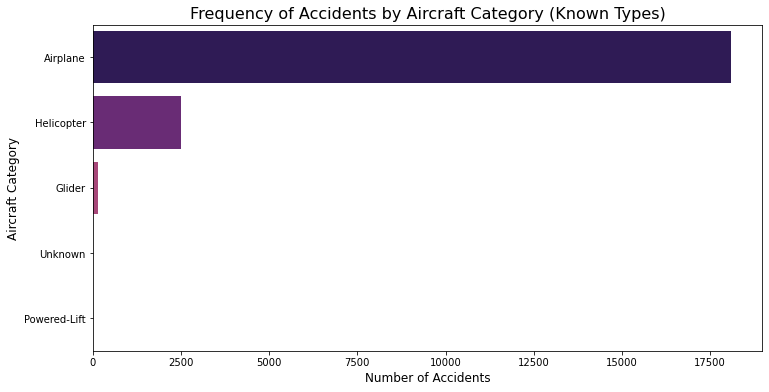

In [480]:
category_counts = df['Aircraft.Category'].value_counts()
# Select the top 10 categories for a cleaner plot
top_categories = category_counts.head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='magma')

plt.title('Frequency of Accidents by Aircraft Category (Known Types)', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Aircraft Category', fontsize=12)
plt.show()

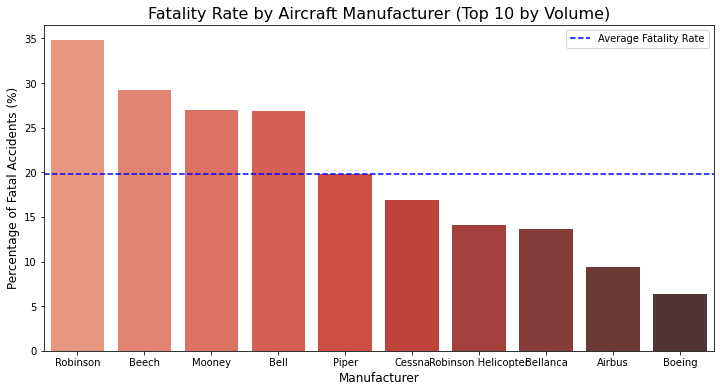

In [481]:

# Identify Top Manufacturers by total accident volume
top_makes = df['Make'].value_counts().nlargest(10).index
df_top = df[df['Make'].isin(top_makes)]

# Calculate Fatality Rate per Make
# Group by Make and Outcome
outcome_counts = df_top.groupby(['Make', 'Outcome']).size().unstack(fill_value=0)

# Calculate Percentage
outcome_counts['Total'] = outcome_counts['Fatal'] + outcome_counts['Non-Fatal']
outcome_counts['Fatality_Rate'] = (outcome_counts['Fatal'] / outcome_counts['Total']) * 100

# Sort by Fatality Rate for the plot
outcome_counts = outcome_counts.sort_values('Fatality_Rate', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts['Fatality_Rate'], palette='Reds_d')

plt.title('Fatality Rate by Aircraft Manufacturer (Top 10 by Volume)', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Percentage of Fatal Accidents (%)', fontsize=12)
plt.axhline(y=outcome_counts['Fatality_Rate'].mean(), color='blue', linestyle='--', label='Average Fatality Rate')
plt.legend()

#### Distribution of Severity Levels

Text(0, 0.5, 'Number of Accidents')

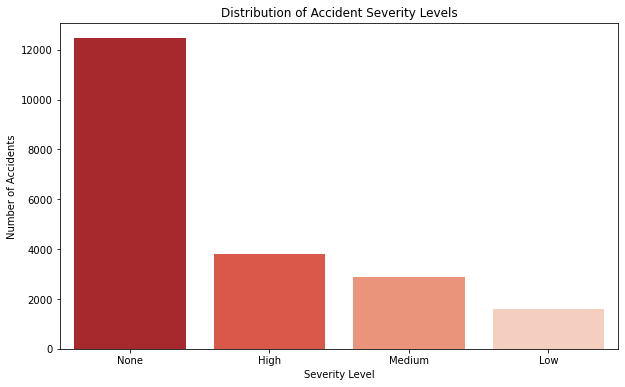

In [482]:
severity_counts = df['Severity.Level'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='Reds_r')
plt.title('Distribution of Accident Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')

### Fatal vs Non-Fatal Accidents within the years
This plot categorizes every accident as either "Fatal" (resulting in death) or "Non-Fatal" (including serious, minor, and no injuries) and tracks these counts by year.

## Damage Outcomes

### Weather conditions

### Severity by weather conditions

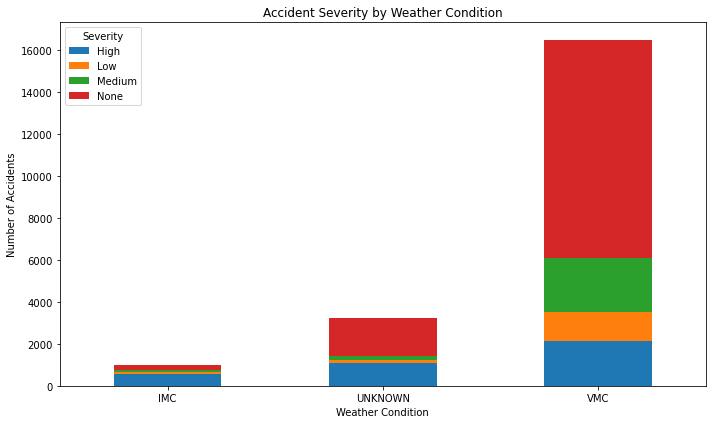

In [483]:
weather_severity_counts = pd.crosstab(df['Weather.Condition'], df['Severity.Level'])
ax = weather_severity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Severity')
plt.tight_layout()
plt.savefig('severity_by_weather_stacked.png')

#### Accidents by Phase of Flight

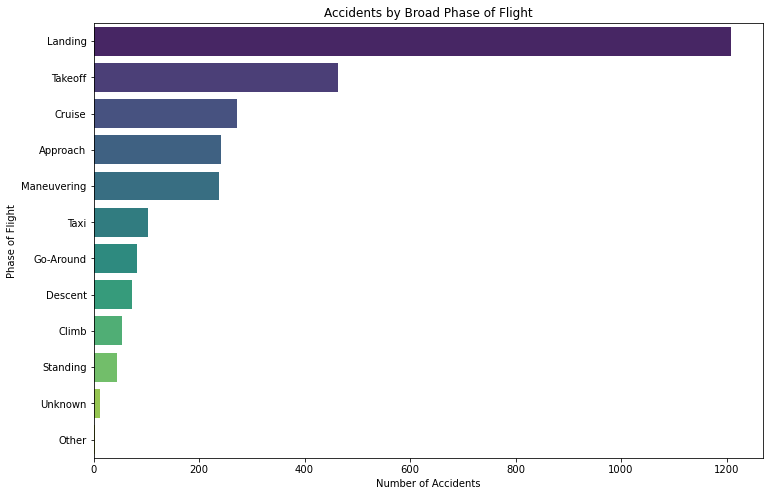

In [484]:
phase_counts = df['Broad.phase.of.flight'].value_counts().reset_index()
phase_counts.columns = ['Phase', 'Count']
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Phase', data=phase_counts, palette='viridis')
plt.title('Accidents by Broad Phase of Flight')
plt.xlabel('Number of Accidents')
plt.ylabel('Phase of Flight')
plt.savefig('accidents_by_phase.png')

Frequency based on engione type

Text(0, 0.5, 'Engine Type')

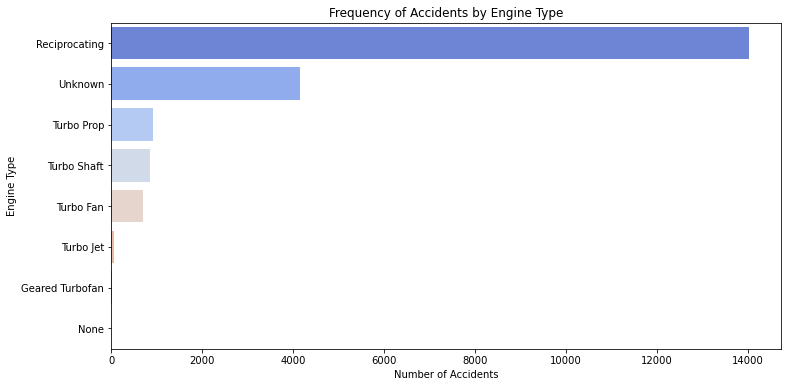

In [485]:
# Count the frequency
engine_counts = df['Engine.Type'].value_counts()

# We'll plot the top categories to keep it readable. 
# There might be some very rare engine types.
top_engines = engine_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_engines.values, y=top_engines.index, palette='coolwarm')
plt.title('Frequency of Accidents by Engine Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Engine Type')

#### Accidents by Manufacturer

#### Fatality Rate by Manufacturer

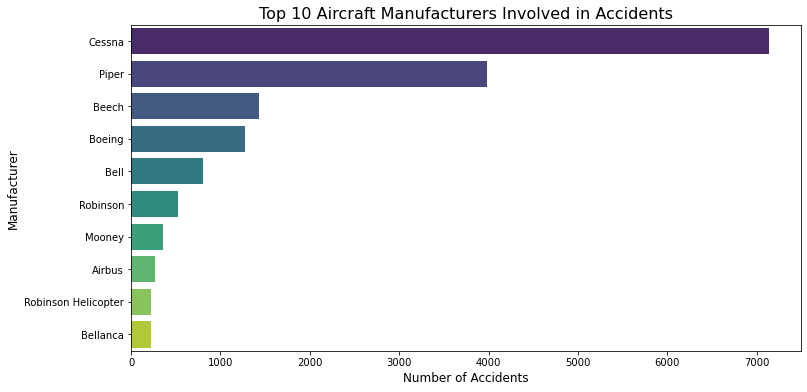

In [486]:
# Identify the top 10 manufacturers
top_makes = df['Make'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.countplot(y='Make', data=df[df['Make'].isin(top_makes)], order=top_makes, palette='viridis')
plt.title('Top 10 Aircraft Manufacturers Involved in Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Manufacturer', fontsize=12)
plt.show()

### Trends over time

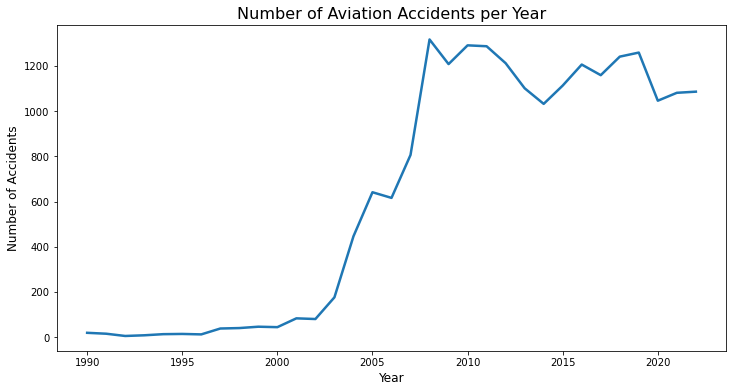

In [487]:
# Count accidents by year and sort chronologically
accidents_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, linewidth=2.5)
plt.title('Number of Aviation Accidents per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.show()

#### Total Fatalities per Year (Line Chart)
This plot sums the Total.Fatal.Injuries for each year

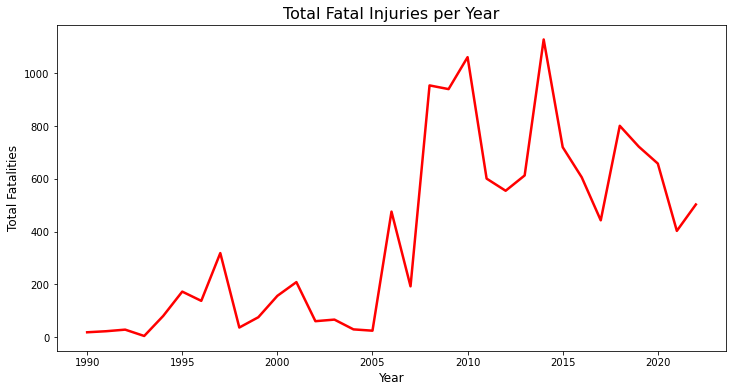

In [488]:
# Group by year and sum the fatalities
fatalities_per_year = df.groupby('Year')['Total.Fatal.Injuries'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=fatalities_per_year.index, y=fatalities_per_year.values, color='red', linewidth=2.5)
plt.title('Total Fatal Injuries per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Fatalities', fontsize=12)
plt.show()

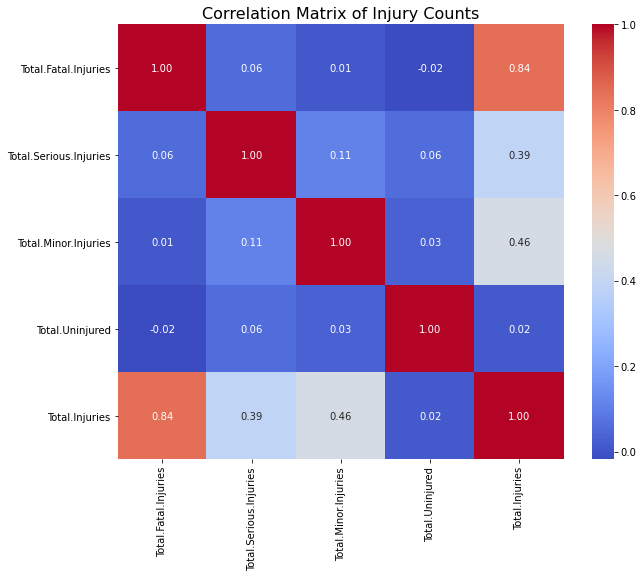

In [489]:
#corelation matrix
correlation_matrix = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total.Injuries']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Injury Counts', fontsize=16)  
plt.show()

## Business Recommendations
Based on the data, three actionable recommendations are proposed to guide aircraft acquisition and operational strategy for the new aviation division.
#### 1. Shift Fleet Acquisition Toward Turbine-Powered Aircraft
The vast majority of accidents involve Reciprocating (piston) engines, which are common in older or smaller general aviation aircraft. For corporate or executive transport, the business should bypass light piston aircraft entirely and instead utilize Boeing or similar turbine-class aircraft, which offer higher safety protocols and passenger protection.

#### Focus on Manufacturer Reliability and Modernization
The "Accidents per Year" trend line shows a steady decrease in accidents over the last few decades, suggesting that newer manufacturing standards and technologies are improving safety. The "Top Manufacturers" chart identifies high-volume makes like Cessna and Piper.

Recommendation: When purchasing aircraft, prioritize newer models (post-2000) that benefit from modern safety engineering. If acquiring older high-volume airframes (e.g., Cessna 172), ensure a comprehensive audit of maintenance logs, as their ubiquity in the accident data warrants extra due diligence.

####
Invest in Commercial-Grade Safety for Corporate Travel: For executive transport, bypass light piston aircraft entirely and utilize Boeing or similar turbine-class aircraft (as seen in the 7.4% rate), where safety protocols and engineering standards provide the highest level of passenger protection.